Build simple CNN for classic Fashion MNIST recognition.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(f"Shape before dim expansion: {x_train.shape}")
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)
print(f"Shape after dim expansion: {x_train.shape}")

Shape before dim expansion: (60000, 28, 28)
Shape after dim expansion: (60000, 28, 28, 1)


In [ ]:
K = len(set(y_train)) # unique elements of y_train
K

10

In [ ]:
# using keras sequential API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)  # thanks to convolution the spatial features are considered
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 19s 4ms/step - loss: 0.5290 - accuracy: 0.8047 - val_loss: 0.4115 - val_accuracy: 0.8444
Epoch 2/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3659 - accuracy: 0.8629 - val_loss: 0.3555 - val_accuracy: 0.8657
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3158 - accuracy: 0.8820 - val_loss: 0.3199 - val_accuracy: 0.8815
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2835 - accuracy: 0.8938 - val_loss: 0.3171 - val_accuracy: 0.8863
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2544 - accuracy: 0.9034 - val_loss: 0.3076 - val_accuracy: 0.8901
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2354 - accuracy: 0.9105 - val_loss: 0.3001 - val_accuracy: 0.8901
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2146 - accuracy: 0.9188 - val_loss: 0.2996 - val_accuracy

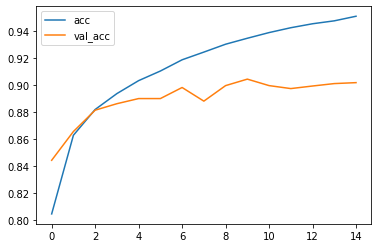

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

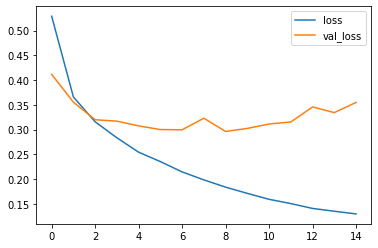

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

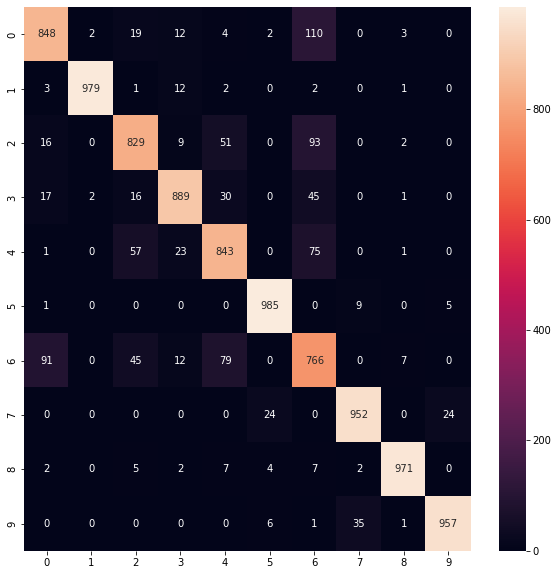

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, fmt='g')

Text(0.5, 1.0, 'True label 6 Predicted: 0')

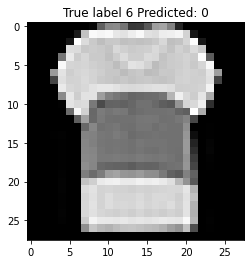

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title(f"True label {y_test[i]} Predicted: {p_test[i]}")